# 워드 클라우드(단어구름) 실습
### amueller의 wordcloud package를 이용한 mask를 활용한 wordcloud 만들기! [참고](https://github.com/kimyoungjin06/wordcloud/blob/master/Make_the_Word_Cloud.ipynb)

## 1. Package import & font, mask, message setup!

- 이 코드는 mask를 다루는 부분, font를 다루는 부분, word를 다루는 부분으로 나뉜다. 먼저 필요한 패키지들을 불러오는데, numpy와 random, palettable은 font 색 설정할 때, PIL은 mask 이미지를 처리할 때, wordcloud는 이 모든 것을 이용해서 word cloud를 그릴 때 이용된다.

- 아래에서 딱히 어려운 점은 없고, color_func가 여기서는 Dark2_8이라는 palette를 이용해서 색을 만들어낸다. Palette를 바꾸고 싶다면 이 부분을 바꾸면 될 것!

- *PIL은 python3에서는 Pillow로 설치하고 PIL로 사용하면 된다.

- *mask로 쓸 이미지는 png파일로 우리가 단어를 배치할 공간만 그림이 존재해야 한다. 나머지 공간엔 흰색이 아니라 아예 이미지가 없는 png파일이 필요하다.

In [23]:
## 오류가 나면 모듈을 설치해야 합니다.
## 아마도 아래와 같은 모듈 오류가 있을 겁니다.
# wordcloud 오류, palettable 오류
# 아래 명령어를 복사해서 anaconda prompt에서 수행하세요.
# conda install -c conda-forge wordcloud
# pip install palettable\

import numpy as np
import random
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
from palettable.colorbrewer.qualitative import Dark2_8
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
# color_func 함수, Dark2_8이라는 pallette를 이용하여 색을 만들어냄.
def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return tuple(Dark2_8.colors[random.randint(0,7)])

# 한글 폰트 지정
font = "NanumPen"
font_path = "%s.ttf" % font

# 아이콘 지정
icon = "Korea" 
icon_path = "%s.png" % icon

### 데이터 입력

In [25]:
# 연설문1
# 아래 KoreaSummit_Moon.txt를 본인이 저장한 파일 이름으로 바꾸세요.
#-*- coding: utf-8 -*-
f = open("Obama_Yes I can.txt", 'r', encoding='euc-kr')
message_of_moon = f.read()
print(message_of_moon)
f.close()

If there is anyone out there who still doubts that America is a place where all things are possible; who still wonders if the dream of our founders is alive in our time; who still questions the power of our democracy, tonight is your answer.
It's the answer told by lines that stretched around schools and churches in numbers this nation has never seen; by people who waited three hours and four hours, many for the very first time in their lives, because they believed that this time must be different; that their voice could be that difference.

It's the answer spoken by young and old, rich and poor, Democrat and Republican, black, white, Latino, Asian, Native American, gay, straight, disabled and not disabled ? Americans who sent a message to the world that we have never been a collection of red states and blue states; we are, and always will be, the United States of America. 

It's the answer that led those who have been told for so long by so many to be cynical, and fearful, and doubtfu

## 2. Load the mask, font coloring, generate word cloud!
- 먼저 icon에 image를 불러오고, mask를 RGB type으로 icon과 같은 사이즈로 전부 (255,255,255)값 (아마 흰색?)으로 만들어내고, 이 (255,255,255)가 이미지가 채워지지 않는 부분을 의미한다. (?Image.new를 참고!), 그리고 나서 이 mask에 아까 불러온 icon의 형상을 붙여넣는다. 그리고 나서 이를 nparray로 만든다.

- 이제 만들어놓은 mask와 불러놨던 font를 이용하여 WordCloud함수를 이용해 wordcloud를 만들어내고, WordCloud.recolor를 이용해서 아까 만들어놓은 color_func()를 사용해 불러온 palette를 이용해 색을 입힌다. 그리고 저장하면 끝!



# 남북정상회담 두 정상의 대화문 워드 클라우드
[연설문 시각화](https://github.com/eventia/CandSpeech/blob/master/wordcloud.py)

In [26]:
# 연설문 1번 전처리
message_of_moon = message_of_moon.split('\n\n')
message_of_moon

["If there is anyone out there who still doubts that America is a place where all things are possible; who still wonders if the dream of our founders is alive in our time; who still questions the power of our democracy, tonight is your answer.\nIt's the answer told by lines that stretched around schools and churches in numbers this nation has never seen; by people who waited three hours and four hours, many for the very first time in their lives, because they believed that this time must be different; that their voice could be that difference.",
 "It's the answer spoken by young and old, rich and poor, Democrat and Republican, black, white, Latino, Asian, Native American, gay, straight, disabled and not disabled ? Americans who sent a message to the world that we have never been a collection of red states and blue states; we are, and always will be, the United States of America. ",
 "It's the answer that led those who have been told for so long by so many to be cynical, and fearful, an

In [27]:
# 연설문 1번 빈도 계산
# except 1-letter word
## min_df: integer(frequency), float(ratio)
tf_vectorizer = CountVectorizer(min_df = 0.001, token_pattern=r'\w{2,}')

tf_corpus1 = tf_vectorizer.fit(message_of_moon)
tf_bow1 = tf_vectorizer.fit_transform(message_of_moon)
tf_bow1

<25x648 sparse matrix of type '<class 'numpy.int64'>'
	with 1340 stored elements in Compressed Sparse Row format>

In [28]:
# 연설문 1 
# check vocabulary in TDM
print(len(tf_corpus1.vocabulary_))
print(len(tf_corpus1.get_feature_names()))
tf_vectorizer.get_feature_names()

648
648


['10',
 '106',
 '16',
 '20',
 '21',
 '221',
 'about',
 'above',
 'achieve',
 'achieved',
 'across',
 'affection',
 'afghanistan',
 'after',
 'ago',
 'agree',
 'ahead',
 'alive',
 'all',
 'alliances',
 'alone',
 'along',
 'already',
 'always',
 'am',
 'america',
 'american',
 'americans',
 'an',
 'and',
 'ann',
 'answer',
 'anyone',
 'anything',
 'apathy',
 'arc',
 'are',
 'arms',
 'around',
 'as',
 'asian',
 'ask',
 'asleep',
 'assembled',
 'at',
 'atlanta',
 'autumn',
 'awake',
 'axelrod',
 'back',
 'backyards',
 'ballot',
 'banner',
 'be',
 'beacon',
 'because',
 'been',
 'began',
 'begin',
 'believed',
 'belongs',
 'bend',
 'berlin',
 'best',
 'better',
 'beyond',
 'biden',
 'bills',
 'birmingham',
 'bitter',
 'black',
 'bless',
 'blesses',
 'block',
 'blue',
 'bombs',
 'bonds',
 'born',
 'both',
 'bowl',
 'brave',
 'braved',
 'break',
 'breathe',
 'brick',
 'bridge',
 'bright',
 'bring',
 'build',
 'built',
 'burns',
 'buses',
 'but',
 'by',
 'call',
 'callused',
 'came',
 'campaig

In [29]:
# 연설문 1
# frequency count
tf_word_sum1 = tf_bow1.toarray().sum(axis=0)
tf_word_name1 = tf_corpus1.get_feature_names()
tf_word_dict1 = {}

for i in range(len(tf_word_sum1)):
    tf_word_dict1[tf_word_name1[i]] = tf_word_sum1[i]
    
print(tf_corpus1.get_feature_names())
tf_word_sum1

['10', '106', '16', '20', '21', '221', 'about', 'above', 'achieve', 'achieved', 'across', 'affection', 'afghanistan', 'after', 'ago', 'agree', 'ahead', 'alive', 'all', 'alliances', 'alone', 'along', 'already', 'always', 'am', 'america', 'american', 'americans', 'an', 'and', 'ann', 'answer', 'anyone', 'anything', 'apathy', 'arc', 'are', 'arms', 'around', 'as', 'asian', 'ask', 'asleep', 'assembled', 'at', 'atlanta', 'autumn', 'awake', 'axelrod', 'back', 'backyards', 'ballot', 'banner', 'be', 'beacon', 'because', 'been', 'began', 'begin', 'believed', 'belongs', 'bend', 'berlin', 'best', 'better', 'beyond', 'biden', 'bills', 'birmingham', 'bitter', 'black', 'bless', 'blesses', 'block', 'blue', 'bombs', 'bonds', 'born', 'both', 'bowl', 'brave', 'braved', 'break', 'breathe', 'brick', 'bridge', 'bright', 'bring', 'build', 'built', 'burns', 'buses', 'but', 'by', 'call', 'callused', 'came', 'campaign', 'campaigned', 'can', 'candidate', 'cannot', 'carried', 'cars', 'cast', 'cause', 'celebrate', 

array([ 1,  2,  1,  1,  1,  1,  3,  2,  2,  2,  1,  1,  1,  3,  1,  1,  3,
        1,  8,  1,  1,  1,  1,  2,  3, 14,  4,  4,  1, 93,  2,  5,  1,  1,
        1,  1, 13,  1,  2, 10,  1,  2,  1,  1,  3,  2,  1,  1,  1,  4,  1,
        2,  1, 14,  1,  6,  5,  2,  1,  1,  2,  1,  1,  3,  2,  2,  1,  1,
        1,  1,  1,  1,  1,  2,  1,  1,  1,  1,  1,  1,  2,  1,  1,  1,  2,
        1,  1,  1,  1,  1,  1,  1, 11, 11,  2,  2,  1,  4,  1, 15,  1,  4,
        1,  1,  2,  2,  1,  1,  3,  2,  2,  6,  1,  1,  2,  1,  1,  1,  1,
        1,  1,  2,  1,  2,  1,  1,  1,  1,  1,  2,  1,  1,  1,  2,  1,  2,
        2,  1,  1,  1,  1,  2,  1,  2,  1,  1,  1,  1,  1,  1,  3,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  2,  3,  1,  1,  2,  1,  1,  1,  1,  4,
        1,  2,  2,  1,  1,  1,  3,  2,  1,  1,  2,  1,  1,  1,  1,  5,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  4,  1,  2,  1,  1,  3,  1,  1,  2,
        2,  1,  1,  1,  1,  2,  1,  3,  1, 27,  1,  1,  1,  1,  2,  1,  1,
        1,  1,  1, 12,  1

In [30]:
# 연설문 1
# 단어별 글자수 확인
tf_word_dict1

{'10': 1,
 '106': 2,
 '16': 1,
 '20': 1,
 '21': 1,
 '221': 1,
 'about': 3,
 'above': 2,
 'achieve': 2,
 'achieved': 2,
 'across': 1,
 'affection': 1,
 'afghanistan': 1,
 'after': 3,
 'ago': 1,
 'agree': 1,
 'ahead': 3,
 'alive': 1,
 'all': 8,
 'alliances': 1,
 'alone': 1,
 'along': 1,
 'already': 1,
 'always': 2,
 'am': 3,
 'america': 14,
 'american': 4,
 'americans': 4,
 'an': 1,
 'and': 93,
 'ann': 2,
 'answer': 5,
 'anyone': 1,
 'anything': 1,
 'apathy': 1,
 'arc': 1,
 'are': 13,
 'arms': 1,
 'around': 2,
 'as': 10,
 'asian': 1,
 'ask': 2,
 'asleep': 1,
 'assembled': 1,
 'at': 3,
 'atlanta': 2,
 'autumn': 1,
 'awake': 1,
 'axelrod': 1,
 'back': 4,
 'backyards': 1,
 'ballot': 2,
 'banner': 1,
 'be': 14,
 'beacon': 1,
 'because': 6,
 'been': 5,
 'began': 2,
 'begin': 1,
 'believed': 1,
 'belongs': 2,
 'bend': 1,
 'berlin': 1,
 'best': 3,
 'better': 2,
 'beyond': 2,
 'biden': 1,
 'bills': 1,
 'birmingham': 1,
 'bitter': 1,
 'black': 1,
 'bless': 1,
 'blesses': 1,
 'block': 2,
 'blue': 

### 시각화

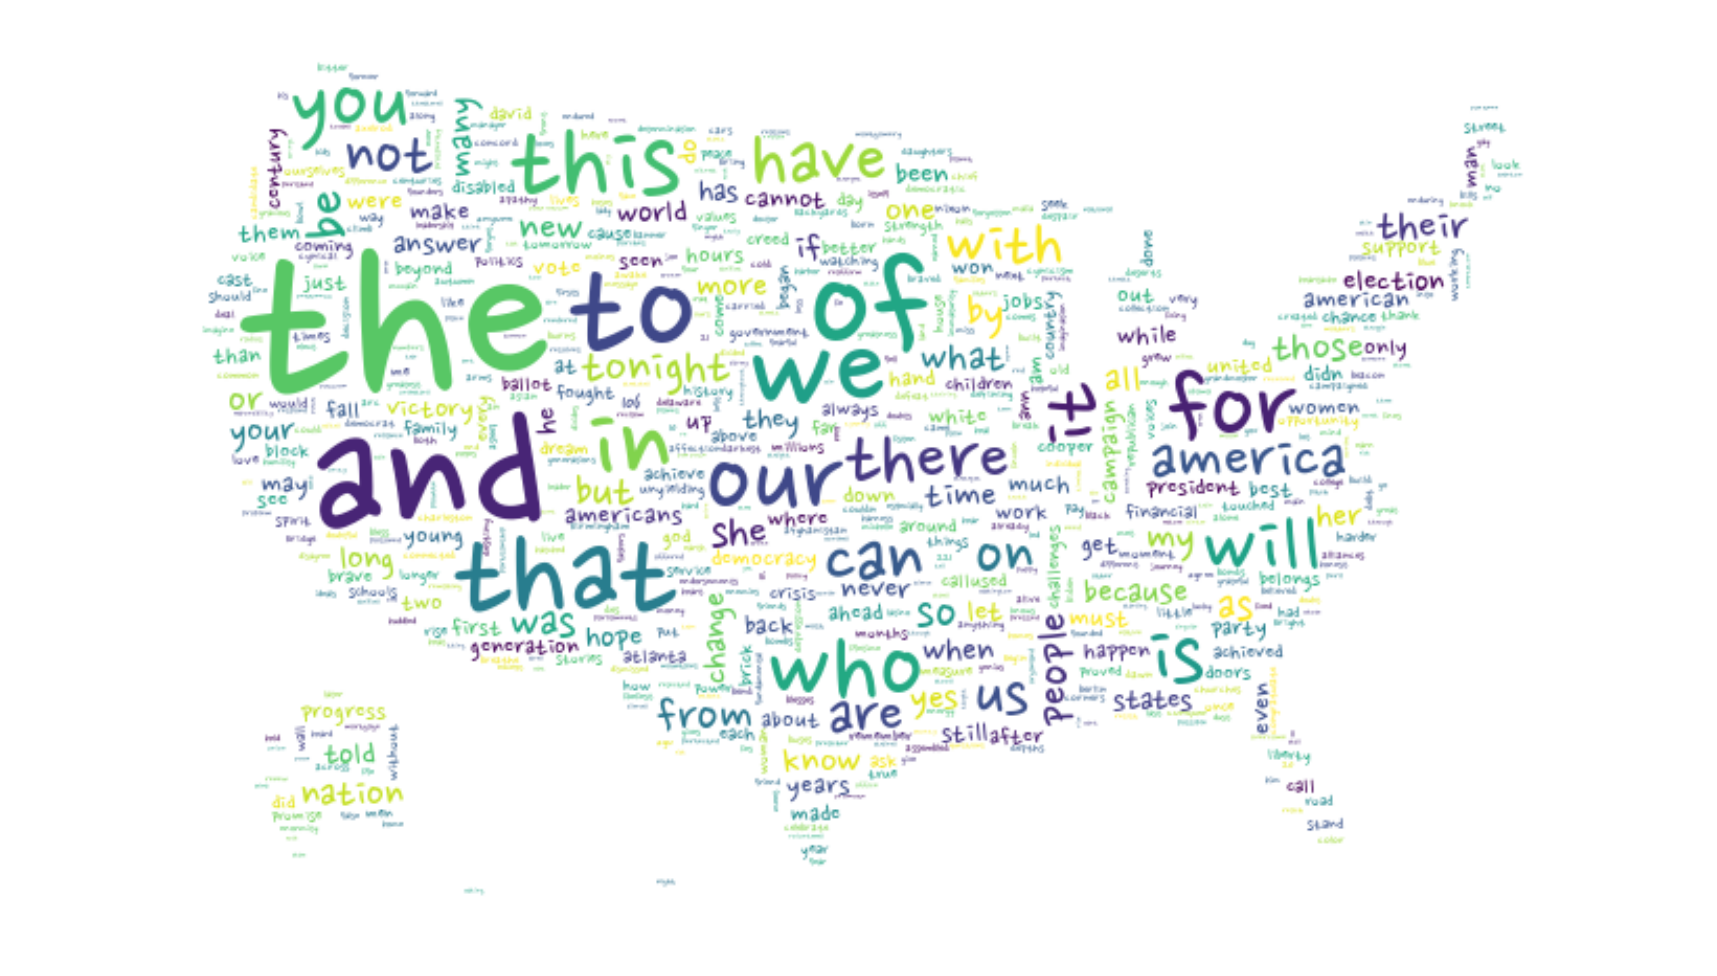

In [31]:
# 연설문 1
icon = Image.open(icon_path).convert("RGBA")
mask = Image.new("RGB", icon.size, (255,255,255))
mask.paste(icon,icon)
mask = np.array(mask)

wc = WordCloud(font_path=font_path, background_color="white", max_words=2000, mask=mask,
               max_font_size=300, random_state=42).generate_from_frequencies(tf_word_dict1)

plt.figure(figsize=(30, 90))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()
wc.to_file("MoonSpeech.png") # 그림파일로 추출하기